<h1 style = "color:red; border-bottom: 4px solid gold; 
           align: center;
           padding-bottom: 5px;">Logistic Regression</h1>

import pandas as pd

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


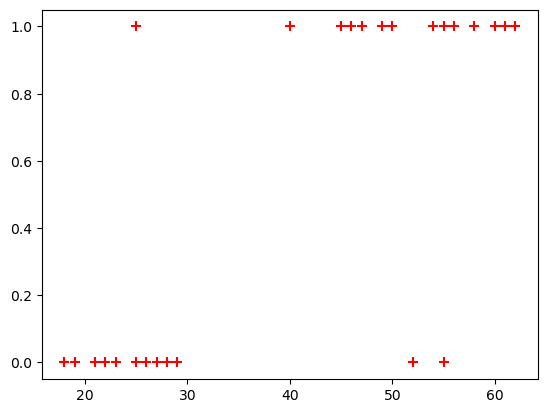

In [3]:
plt.scatter(df.age,df.bought_insurance,marker="+",color ="red",s =50)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
X = df[["age"]]
y= df.bought_insurance

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [5]:
pred = model.predict(X)
pred

array([0.10010227, 0.17115409, 0.69220073, 0.81062042, 0.66851679,
       0.90535618, 0.88167224, 1.00009193, 1.04745981, 1.02377587,
       0.00536652, 0.2422059 , 0.21852197, 0.26588984, 0.73956861,
       0.88167224, 0.17115409, 0.95272406, 0.02905046, 0.00536652,
       0.07641834, 0.19483803, 0.52641316, 0.64483286, 0.76325255,
       0.8579883 , 0.12378621])

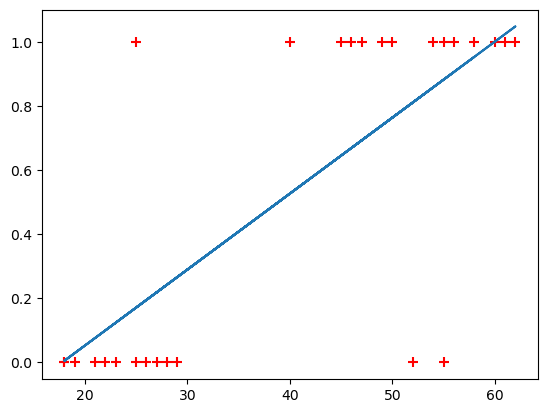

In [6]:
plt.scatter(df.age,df.bought_insurance,marker="+",color ="red",s =50)
plt.plot(df.age,pred)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split  

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df[["age"]], df.bought_insurance,train_size=0.9)

In [9]:
X_test

,age
5,56
1,25
20,21


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
model.predict(X_test)

array([1, 0, 0], dtype=int64)

In [12]:
model.score(X_test,y_test)

1.0

In [13]:
model.predict_proba(X_test)

array([[0.09947976, 0.90052024],
       [0.84309054, 0.15690946],
       [0.89867802, 0.10132198]])

**Homework**

* Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
* Plot bar charts showing impact of employee salaries on retention
* Plot bar charts showing corelation between department and employee retention
* Now build logistic regression model using variables that were narrowed down in step 1
* Measure the accuracy of the model

In [14]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [16]:
df.left.value_counts(normalize=True)  #% attrition

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [17]:
df.groupby("left").mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Comment on strong variables to use here

* satisfaction level will be a good driver
* last evaluation is not a clear driver by itself
* number_project may have little impact
* average_monthly_hours may have little impact
* time_spend_company, work_accident and promotion_last_5years will be a good driver

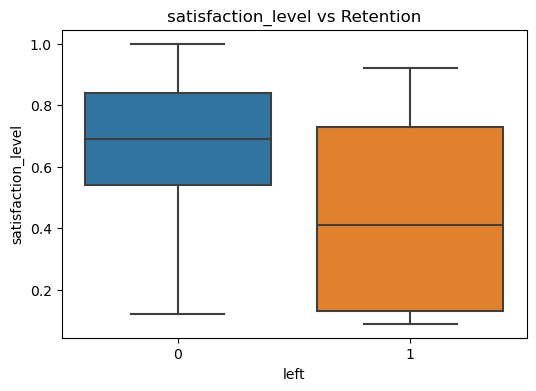

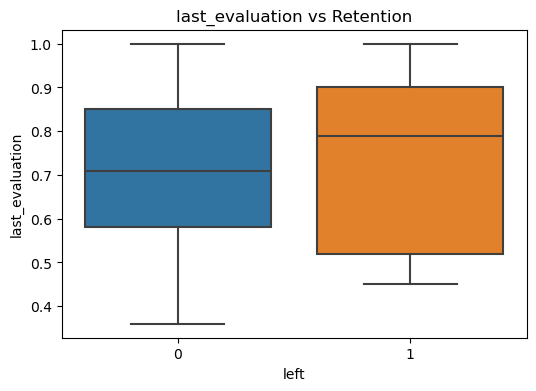

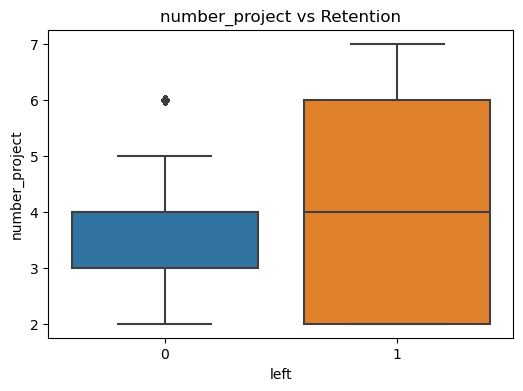

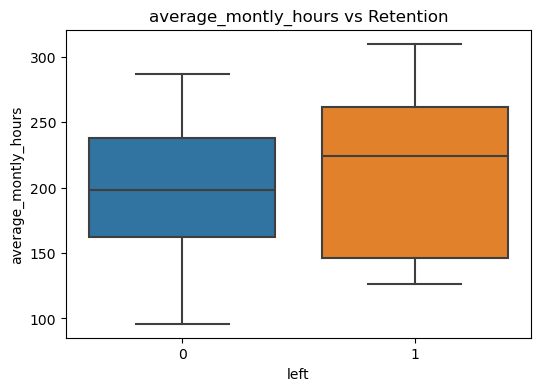

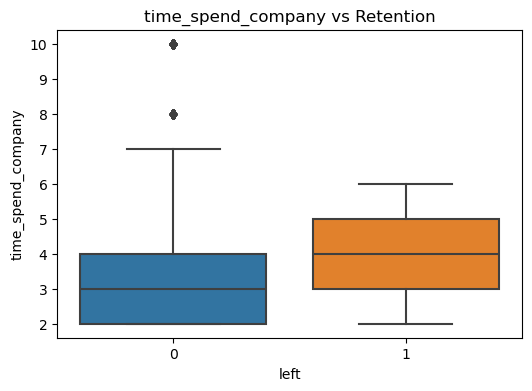

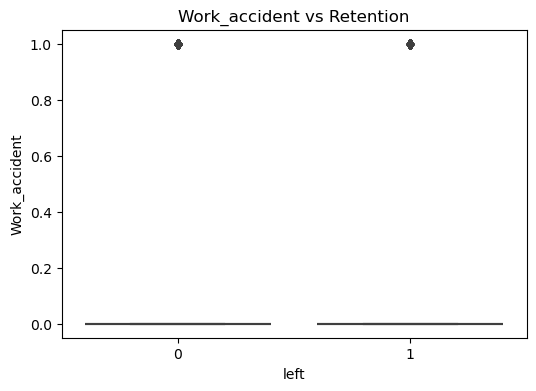

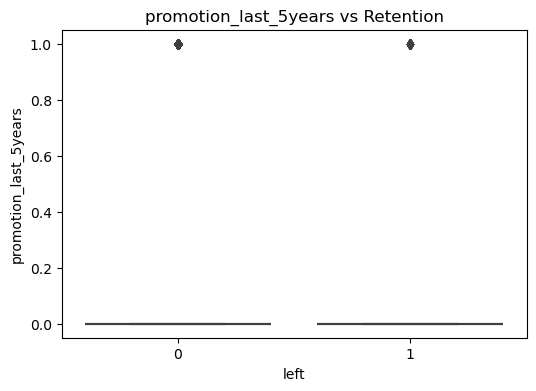

In [18]:
cols =['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years']

for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x = "left", y=col, data=df)
    plt.title(f"{col} vs Retention")

In [19]:
df['left'] = df['left'].astype(str)         # hue must be string
df['Department'] = df['Department'].astype(str)
df['salary'] = df['salary'].astype(str)


<h2 style = "color:red; border-bottom: 4px solid gold; 
           align: center;
           padding-bottom: 5px;">Count Plot</h2>

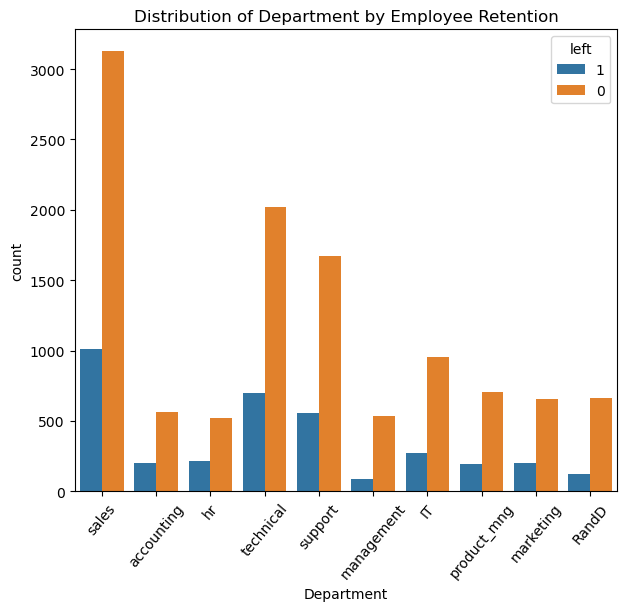

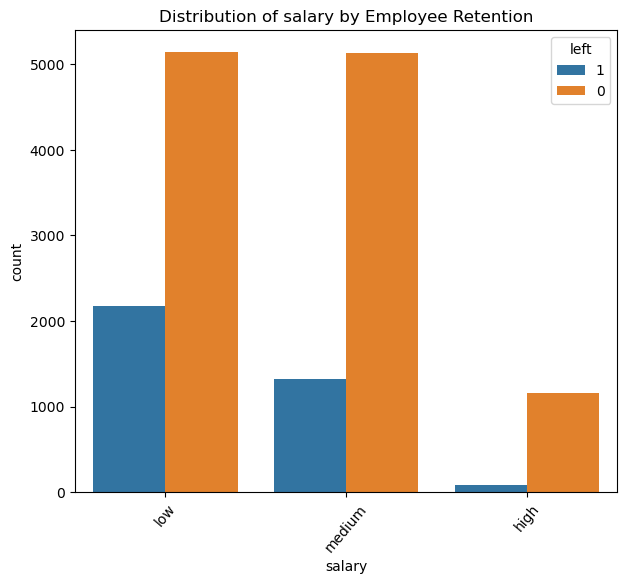

In [20]:
cat_vars = ["Department", "salary"]

for cat in cat_vars:
    plt.figure(figsize=(7,6))
    sns.countplot(x=cat, hue="left", data=df)
    plt.title(f"Distribution of {cat} by Employee Retention")
    plt.xticks(rotation=50)
    plt.show()


<h2 style = "color:red; border-bottom: 4px solid gold; 
           align: center;
           padding-bottom: 5px;">Correlation heatmap</h2>

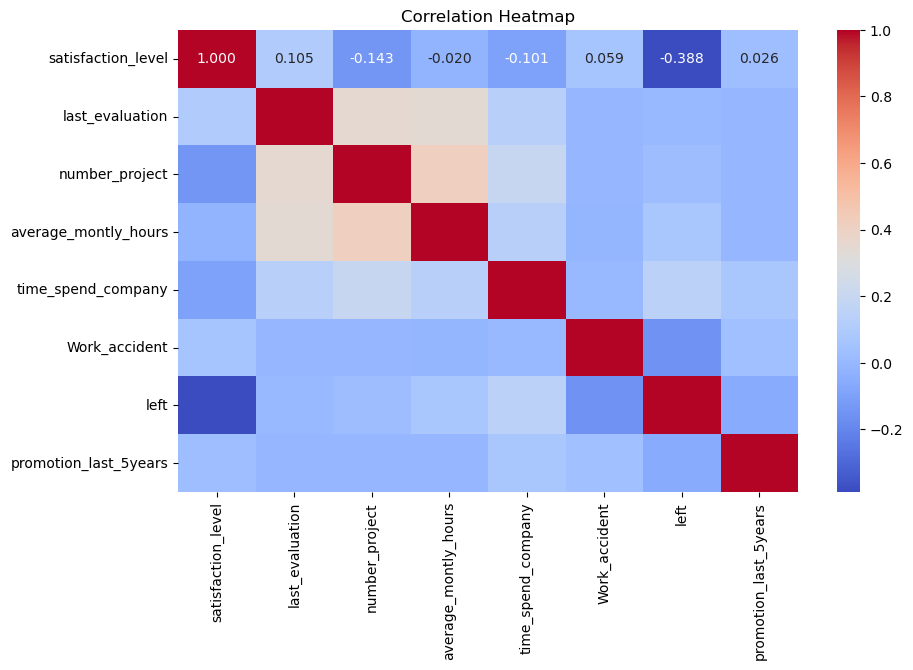

In [21]:
## Correlation heatmap
df["left"] = df["left"].astype(int)
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True,cmap="coolwarm", fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()


<h5 style= "color:red">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h5>

* Satisfaction level
* average_monthly_hours
* time_spend_company
* work_accident
* promotion_last_5years

In [22]:
X = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','Work_accident']]
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,Work_accident
0,0.38,157,0,low,0
1,0.80,262,0,medium,0
2,0.11,272,0,medium,0
3,0.72,223,0,low,0
4,0.37,159,0,low,0


In [23]:
X_dummy = pd.get_dummies(X.salary,drop_first=True,prefix="salary").astype(int)
X_final = pd.concat([X,X_dummy],axis = 1)

# Drop original salary and add dummies
X_final = pd.concat([X.drop('salary', axis=1), X_dummy], axis=1)


X_final.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [24]:
from sklearn.model_selection import train_test_split
X_train_2,X_test_2,y_train_2,y_test_2 = train_test_split(X_final,df.left,test_size=0.3)

from sklearn.linear_model import LogisticRegression
mod2 = LogisticRegression()
mod2.fit(X_train_2,y_train_2)


LogisticRegression()

In [25]:
mod2.predict(X_test_2)

array([0, 0, 0, ..., 1, 0, 1])

In [26]:
mod2.score(X_test_2,y_test_2)

0.772